# Início

Analise do dataset encontrado no Kaggle: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Data description
There are 3 types of input features:

1. Objective: factual information;
2. Examination: results of medical examination;
3. Subjective: information given by the patient.

Features:

- Age | Objective Feature | age | int (days)

- Height | Objective Feature | height | int (cm) |

- Weight | Objective Feature | weight | float (kg) |

- Gender | Objective Feature | gender | categorical code |

- Systolic blood pressure | Examination Feature | ap_hi | int |

- Diastolic blood pressure | Examination Feature | ap_lo | int |

- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

- Smoking | Subjective Feature | smoke | binary |

- Alcohol intake | Subjective Feature | alco | binary |

- Physical activity | Subjective Feature | active | binary |

- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |






### Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn


import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("cardio.csv", sep=';')

In [3]:
df.shape

(70000, 13)

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#mudando a idade para anos
df['age'] = df['age'] // 365

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Podemos observar que não há valores nulos e todos os dados são numéricos. 

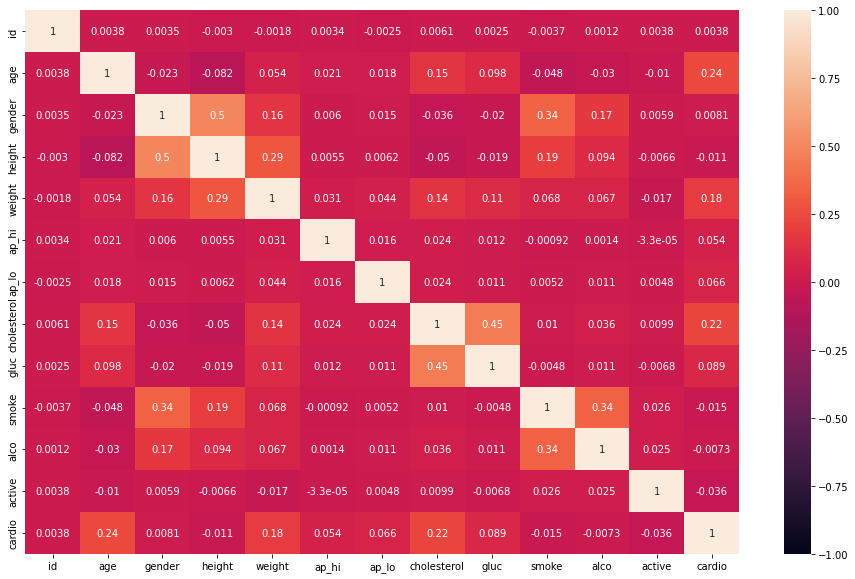

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [9]:
#dropando a coluna de ID 
#df.drop(labels='id', axis=1, inplace=True)

### Dividindo os dados para treino, teste e validação

50% treino, 25% teste e 25% validação

In [10]:
X = np.array(df.drop(['cardio'], 1)) #features
y = np.array(df['cardio']) #target

C:\Users\danta\AppData\Local\Temp/ipykernel_12004/2592947230.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['cardio'], 1)) #features


In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1) 

 X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=1)

In [12]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(35000, 12) (35000,) (17500, 12) (17500,)


In [13]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(35000, 12) (35000,) (17500, 12) (17500,) (17500, 12) (17500,)


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
#normalizando os dados

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)
X = sc_X.fit_transform(X)

In [16]:
clf = knn()

# Otimizando os parametros (GridSearch)

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
#lista com os valores de K que serão testados
k_list = list(range(1,25))
parameters = dict(n_neighbors=k_list)

In [19]:
%%time
parameters = {'n_neighbors':k_list,'metric':['euclidean','chebyshev']}
grid = GridSearchCV(clf,parameters,cv=5,scoring='accuracy')
grid.fit(X_val,y_val) #usando o conjunto de validação para determinar os parametros com o GridSearch


Wall time: 3min 13s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             scoring='accuracy')

In [20]:
scores = pd.DataFrame(grid.cv_results_)

In [21]:
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038809,0.001166,0.371386,0.005234,euclidean,1,"{'metric': 'euclidean', 'n_neighbors': 1}",0.585143,0.583429,0.580571,0.584000,0.570857,0.580800,0.005195,45
1,0.038009,0.001414,0.416699,0.005459,euclidean,2,"{'metric': 'euclidean', 'n_neighbors': 2}",0.583714,0.574286,0.579429,0.577714,0.573714,0.577771,0.003652,47
2,0.037809,0.000748,0.442509,0.005240,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.604000,0.614571,0.611714,0.609143,0.596286,0.607143,0.006447,38
3,0.038696,0.000412,0.476441,0.015908,euclidean,4,"{'metric': 'euclidean', 'n_neighbors': 4}",0.602286,0.602571,0.610286,0.600000,0.595143,0.602057,0.004900,41
4,0.039809,0.001601,0.494512,0.012309,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.613429,0.622571,0.616286,0.618857,0.611429,0.616514,0.003940,31


In [22]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 23}

In [23]:
grid.best_score_

0.6340571428571428

In [24]:
#Aplicando os parametros dados pelo GridSearch
clf = knn(n_neighbors=21, metric='euclidean')

In [25]:
#Treinando o conjunto com os parametros definidos
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

### Métricas (Accuracy, Precision, Recall, F1-Score)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_pred_train = clf.predict(X_train)

In [28]:
y_pred_val = clf.predict(X_val)

In [29]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
y_test

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [31]:
accuracy = clf.score(X_test, y_test)
accuracy

0.6417714285714285

In [32]:
from sklearn.metrics import classification_report as cr

In [33]:
#Metricas para o conjunto de teste
target_names = ['Ausencia de Doença Cardiaca', 'Presença de Doença Cardiaca']
print(cr(y_test, y_pred, target_names=target_names))

                             precision    recall  f1-score   support

Ausencia de Doença Cardiaca       0.62      0.68      0.65      8613
Presença de Doença Cardiaca       0.66      0.60      0.63      8887

                   accuracy                           0.64     17500
                  macro avg       0.64      0.64      0.64     17500
               weighted avg       0.64      0.64      0.64     17500



Support indica a quantidade de pessoas com Ausencia ou Presença de Doença Cardiaca no conjunto de teste (y_test)

In [34]:
#Metricas para o conjunto de treino
target_names = ['Ausencia de Doença Cardiaca', 'Presença de Doença Cardiaca']
print(cr(y_train, y_pred_train, target_names=target_names))

                             precision    recall  f1-score   support

Ausencia de Doença Cardiaca       0.68      0.72      0.70     17721
Presença de Doença Cardiaca       0.69      0.65      0.67     17279

                   accuracy                           0.68     35000
                  macro avg       0.68      0.68      0.68     35000
               weighted avg       0.68      0.68      0.68     35000



In [35]:
#Metricas para o conjunto de validação

In [36]:
target_names = ['Ausencia de Doença Cardiaca', 'Presença de Doença Cardiaca']
print(cr(y_val, y_pred_val, target_names=target_names))

                             precision    recall  f1-score   support

Ausencia de Doença Cardiaca       0.63      0.68      0.65      8687
Presença de Doença Cardiaca       0.65      0.60      0.63      8813

                   accuracy                           0.64     17500
                  macro avg       0.64      0.64      0.64     17500
               weighted avg       0.64      0.64      0.64     17500



#  Otimizanndo os parametros PSO

In [37]:
pip install pyswarms

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

In [39]:
max_bounds = 5.12 * np.ones(2)
min_bounds = - max_bounds
bounds = (min_bounds, max_bounds)

In [40]:
%%time

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)
cost, pos = optimizer.optimize(fx.rastrigin, iters=1000)

2021-11-08 09:58:07,739 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|1000/1000, best_cost=0
2021-11-08 09:58:08,764 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [2.96122341e-09 1.06816414e-10]


Wall time: 1.03 s


In [41]:
from sklearn.metrics import classification_report as cr

In [43]:
def fit_func(k, X_train, y_train):
  if int(k[0,1]) == 1:
    metric = 'euclidean'
  else:
    metric = 'chebyshev'
  clf_pso = knn(n_neighbors=int(k[0,0]), metric = metric)
  clf_pso.fit(X_train, y_train)
  acrcy = cr(y_val, clf_pso.predict(X_val), output_dict=True)['accuracy']
  return 1-acrcy

max_bound = np.array([25, 3])
min_bound = np.array([1,1])
bounds_pso = (min_bound, max_bound)

options = {'c1': 0.3, 'c2': 0.3, 'w': 0.5}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds_pso)
cost, pos = optimizer.optimize(fit_func, iters=1000, X_train = X_train, y_train = y_train)

2021-11-08 10:02:49,520 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.3, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|1000/1000, best_cost=0.361
2021-11-08 12:11:49,874 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.3611428571428571, best pos: [21.26023425  1.94963232]


In [44]:
if int(pos[1]) == 1:
  metric = 'euclidean'
else:
  metric = 'chebyshev'
clf = knn(metric = metric, n_neighbors=int(pos[0]))
clf.fit(X_train, y_train)
print(cr(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      8613
           1       0.66      0.60      0.63      8887

    accuracy                           0.64     17500
   macro avg       0.64      0.64      0.64     17500
weighted avg       0.64      0.64      0.64     17500

